### Checking how the most energetic track plot looks over differing voxel sizes

In [48]:
import sys,os,os.path
#sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/gluster/data/next/software/IC_satkill/")
#sys.path.append("/gluster/data/next/software/IC_sophronia/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/gluster/data/next/software/IC_satkill/'

sys.path.append('/gluster/data/next/notebooks/john_books/fom_fitting')
import functions as func

import time
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

import imageio
import re

import pandas as pd
import numpy  as np
import tables as tb

# human sorting
def tryint(s):
    """
    Return an int if possible, or `s` unchanged.
    """
    try:
        return int(s)
    except ValueError:
        return s

def alphanum_key(s):
    """
    Turn a string into a list of string and number chunks.

    >>> alphanum_key("z23a")
    ["z", 23, "a"]

    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def human_sort(l):
    """
    Sort a list in the way that humans expect.
    """
    l.sort(key=alphanum_key)



In [4]:
def produce_energetic_track_lists(MC_tracks, RECO_tracks):
    '''
    Takes MC track info and RECO/DECO track info and selects most energetic track from each event to compare
    '''

    MC_Es = []
    RECO_Es = []


    # just taking the most energetic tracks


    for (event, df) in tqdm(MC_tracks.groupby('event_id')):
        # Create X,Y positions for track energy by event ID for MC against satkill, allow multiple inputs if there are multiple inputs

        # order by energy, check if they have equal number of tracks in each, then make tuples

        df_sort = df.sort_values(by=['track_energy'], ascending=False)

        df_tracks = RECO_tracks[RECO_tracks.event == event*2]
        df_tracks = df_tracks.sort_values(by = ['energy'], ascending=False)


        # if track energies are similar (they should be) save
        if np.isclose(df_sort.track_energy.sum(), df_tracks.energy.sum(), atol = 0.01):

            #print(f"event: {event}")
            #display(df_sort)
            #print(f"Total energy: {df.track_energy.sum()} MeV")

            #display(df_tracks)
            #print(f"Total energy: {df_tracks.energy.sum()} MeV")

            ## save the highest energy track from each to compare
            MC_Es.append(df_sort.iloc[0].track_energy)
            RECO_Es.append(df_tracks.iloc[0].energy)


    return (MC_Es, RECO_Es)

In [5]:
# load in MC topology information
MC_tracks = pd.read_hdf('nsk_sk_distros/MC_topology_info.h5')

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_12/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 87009
Calculating energetic tracks...


100%|██████████| 100009/100009 [03:12<00:00, 519.13it/s]


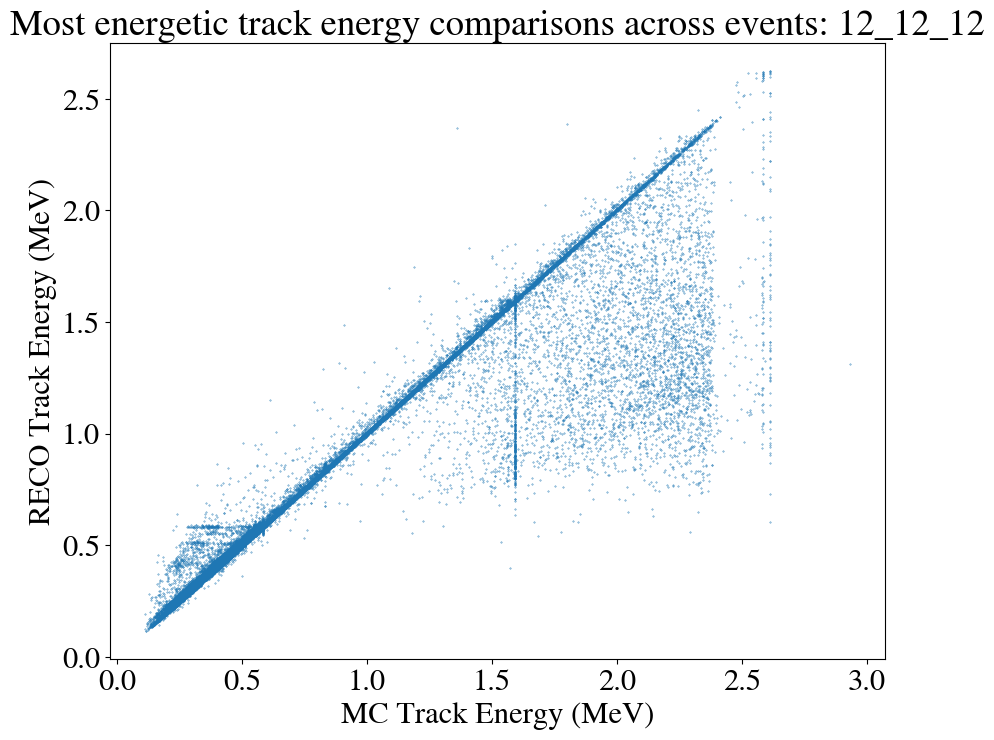

/gluster/data/next/software/miniconda/envs/IC-3.8-2022-04-13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


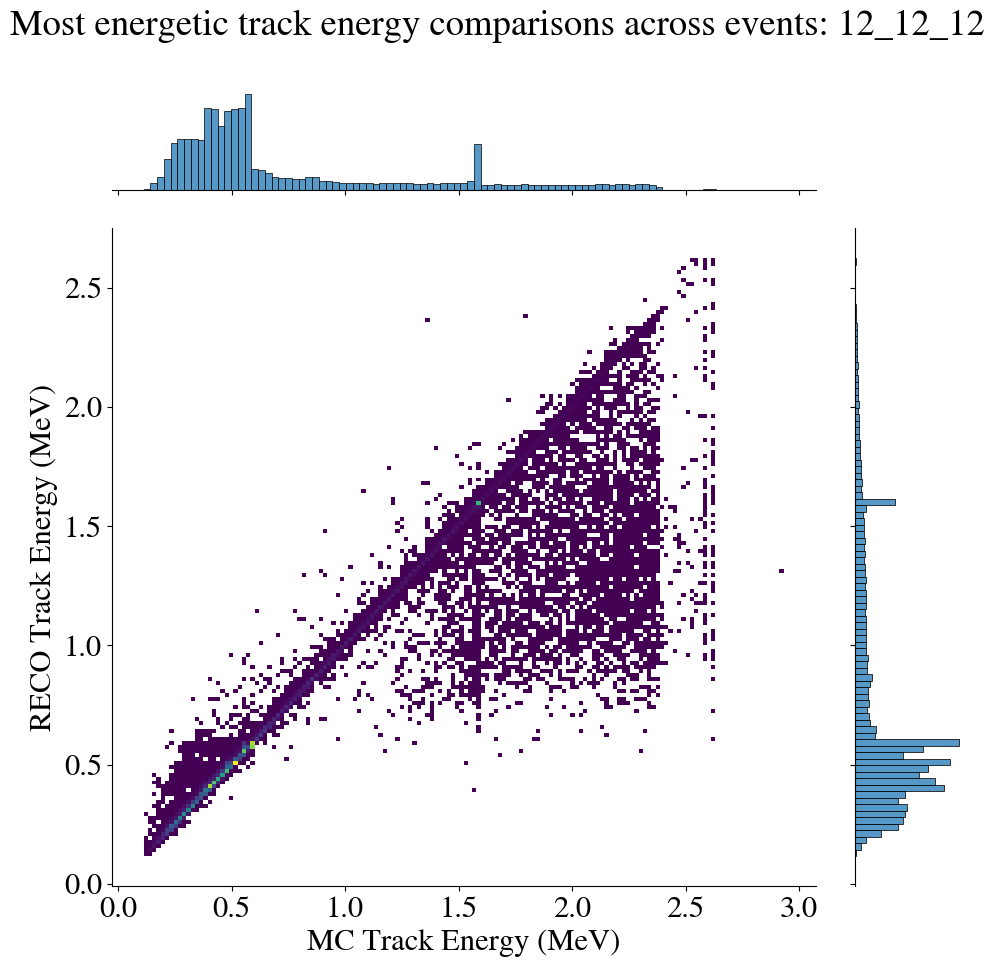

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/PORT_1a/isaura/
50
100
150
200
250


In [ ]:

# list of folder paths for differing voxelisations
voxS_blobRs = ['12_12_12', '12_12_18', '12_12_24',
               '15_15_12', '15_15_18', '15_15_24',
               '9_9_12', '9_9_18', '9_9_24']


start_str = '/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/'
end_str = '/PORT_1a/isaura/'

for i in voxS_blobRs:
    # load in reco info
    full_str = start_str + i + end_str
    RECO_tracks = func.collate_ports([full_str])
    
    print("Calculating energetic tracks...")
    vals = produce_energetic_track_lists(MC_tracks, RECO_tracks)
    
    plt.scatter(vals[0], vals[1], s = 0.1)
    plt.xlabel('MC Track Energy (MeV)')
    plt.ylabel('RECO Track Energy (MeV)')
    plt.title(f"Most energetic track energy comparisons across events: {i}")
    plt.savefig('voxel_size_pics/' + str(i) + '.png')
    plt.show()
    plt.close()
    
    h = sns.jointplot(vals[0], vals[1], kind = 'hist', height = 10, cmap = cm.viridis, bins = 150)
    h.set_axis_labels('MC Track Energy (MeV)', 'RECO Track Energy (MeV)')
    plt.suptitle(f"Most energetic track energy comparisons across events: {i}")
    h.figure.tight_layout()
    #plt.xlabel('MC Track Energy (MeV)')
    #plt.ylabel('RECO Track Energy (MeV)')
    #plt.title(f"Most energetic track energy comparisons across events: {i}")
    plt.savefig('voxel_size_pics/hist/' + str(i) + 'hist.png')
    plt.show()
    plt.close()

In [15]:
active_dir = 'voxel_size_pics/'

files = [f for f in os.listdir(active_dir) if os.path.isfile(os.path.join(active_dir, f))]

# sort files in a human manner
files.sort(key=alphanum_key)
print(files)
images = []
for filename in files:
    images.append(imageio.imread(active_dir + filename))

imageio.mimsave('nice_outputs/' + 'energetic_tracks.gif', images, loop = 0, fps = 1)

['9_9_12.png', '9_9_18.png', '9_9_24.png', '12_12_12.png', '12_12_18.png', '12_12_24.png', '15_15_12.png', '15_15_18.png', '15_15_24.png']


/tmp/ipykernel_2224769/4261632762.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(active_dir + filename))


In [47]:
import matplotlib
matplotlib.__version__

'3.4.3'

/gluster/data/next/software/miniconda/envs/IC-3.8-2022-04-13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


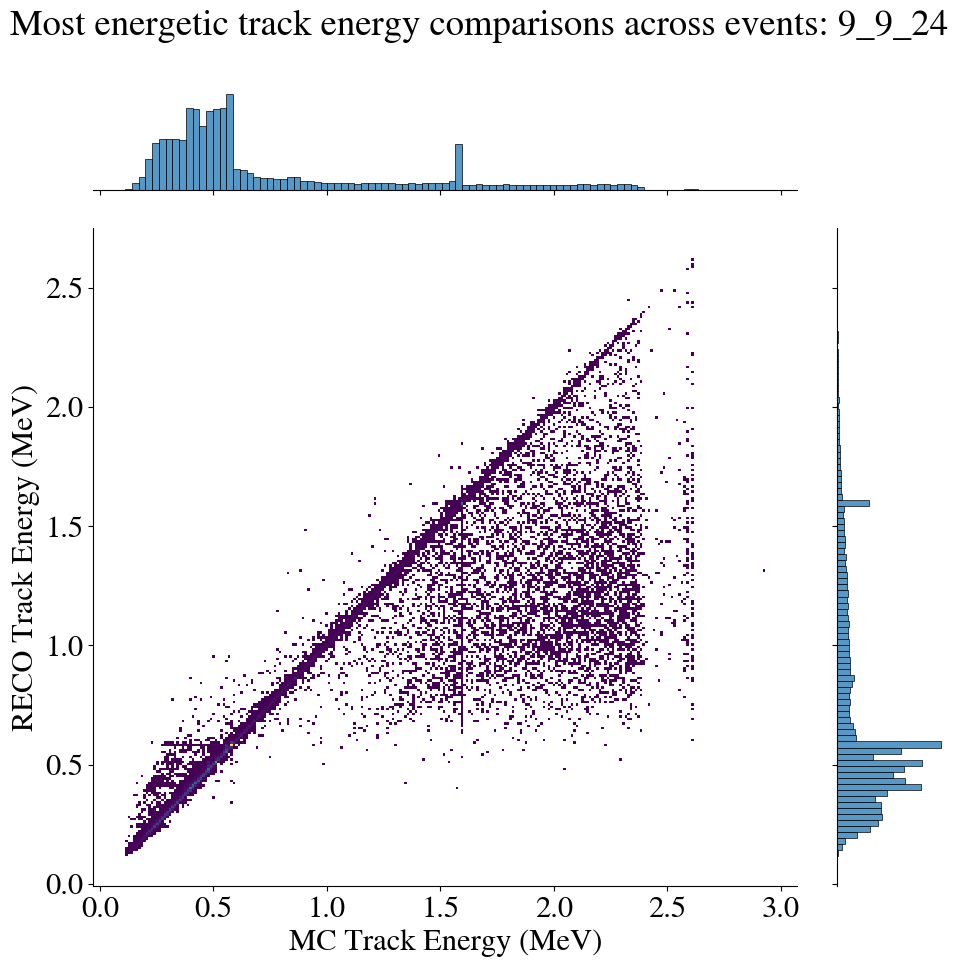

In [62]:
import seaborn as sns
h = sns.jointplot(vals[0], vals[1], kind = 'hist', height = 10, cmap = cm.viridis, bins = 250)
h.set_axis_labels('MC Track Energy (MeV)', 'RECO Track Energy (MeV)')
plt.suptitle(f"Most energetic track energy comparisons across events: {i}")
h.figure.tight_layout()
#plt.xlabel('MC Track Energy (MeV)')
#plt.ylabel('RECO Track Energy (MeV)')
#plt.title(f"Most energetic track energy comparisons across events: {i}")
plt.savefig('voxel_size_pics/hist/' + str(i) + 'hist.png')
plt.show()

In [32]:
sns.__version__

'0.11.2'